In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize


In [2]:
# Step 1: Create dummy time series data
np.random.seed(0)
data = np.cumsum(np.random.randn(100))  # Random walk data
train, test = data[:80], data[80:]

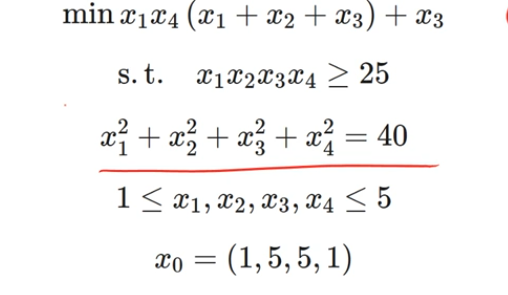

In [3]:
train

array([ 1.76405235,  2.16420955,  3.14294754,  5.38384074,  7.25139873,
        6.27412085,  7.22420927,  7.07285206,  6.96963321,  7.38023171,
        7.52427528,  8.97854879,  9.73958651,  9.86126153, 10.30512476,
       10.63879909, 12.13287816, 11.9277199 , 12.2407876 , 11.38669186,
        8.83370204,  9.48732064, 10.35175684,  9.60959182, 11.87934644,
       10.42498077, 10.47073928, 10.28355543, 11.81633465, 13.28569342,
       13.44064084, 13.81880336, 12.93101762, 10.95022115, 10.602309  ,
       10.75865797, 11.98894865, 13.1913285 , 12.80400168, 12.50169893,
       11.45314596, 10.03312803,  8.32685784, 10.27763323,  9.76798105,
        9.32990675,  8.07711139,  8.85460174,  7.2407039 ,  7.02796362,
        6.13249705,  6.51939955,  6.00859441,  4.82796223,  4.79978   ,
        5.22811187,  5.2946291 ,  5.59710099,  4.9627789 ,  4.60003773,
        3.92757729,  3.56802412,  2.75487784,  1.02859524,  1.20602138,
        0.80424045, -0.8259579 , -0.36317565, -1.27047401, -1.21

In [4]:
test

array([-3.60853257, -2.70770608, -2.24204364, -3.77828733, -2.29003514,
       -0.39414596,  0.78463361,  0.60470877, -0.46604385,  0.58840788,
        0.18523093,  1.407676  ,  1.61595098,  2.59259002,  2.94895641,
        3.65552958,  3.6660296 ,  5.4519001 ,  5.57881219,  5.98080155])

In [15]:

# Step 2: Define objective function (minimize validation MSE)
def objective(params):
      # lag must be an integer

    p = int(params[0])
    d = int(params[1])
    q = int(params[2])

    try:
        model = ARIMA(train, order=(p,d,q)).fit()
    
        preds = model.predict(start=len(train), end=len(train)+len(test)-1)
        mse = mean_squared_error(test, preds)
        print(f"Current MSE: {mse} for params: {params}")
        return mse
    except Exception as e:
        print(f"Error with lag : {e}")
        
def constraint_p_positive(params):
    return params[0] - 1

def constraint_d_positive(params):
    return params[1] - 1

def constraint_q_positive(params):
    return params[2] - 1

def constraint_mse_improvement(params):
    return 50 - objective(params)

constraints = [
    {'type': 'ineq', 'fun': constraint_p_positive},
    {'type': 'ineq', 'fun': constraint_d_positive},
    {'type': 'ineq', 'fun': constraint_q_positive},
    {'type': 'ineq', 'fun': constraint_mse_improvement}
]


In [16]:
# Bounds and initial guess
bounds = [(1, 60), (1, 30), (1, 35)]  # Modify as needed
initial_guess = [10, 10, 1]

In [17]:
minimize(objective, x0=initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10. 10.  1.]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10. 10.  1.]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10.00000001 10.          1.        ]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10.         10.00000001  1.        ]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10.         10.          1.00000001]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10. 10.  1.]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10. 10.  1.]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10.00000001 10.          1.        ]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10.         10.00000001  1.        ]


/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Current MSE: 3879978565.234442 for params: [10.         10.          1.00000001]


 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 3879978565.234442
       x: [ 1.000e+01  1.000e+01  1.000e+00]
     nit: 5
     jac: [ 0.000e+00  0.000e+00  0.000e+00]
    nfev: 4
    njev: 1

In [33]:
(len(train))

80

In [17]:
(1, len(train) - 1)

(1, 79)

In [ ]:




# Step 3: Use minimize to find optimal lag
result = minimize(objective, x0=[41], bounds=[(1, 20)], method='BFGS')

best_lag = int(result.x[0])
print(f"Best lag: {best_lag}")


Best lag: 41


/tmp/ipykernel_77938/739356272.py:18: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(objective, x0=[41], bounds=[(1, 20)], method='BFGS')
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


In [19]:
%pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 KB 2.9 MB/s eta 0:00:002.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 KB 3.2 MB/s eta 0:00:003.2 MB/s eta 0:00:01
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.6/580.6 KB 3.0 MB/s eta 0:00:003.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
import optuna

In [21]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import optuna

# Sample data (replace with your own `train` and `test`)
# train = your training time series
# test = your testing time series

def objective(trial):
    # Suggest integers for ARIMA(p,d,q)
    p = trial.suggest_int('p', 1, 5)
    d = trial.suggest_int('d', 1, 2)
    q = trial.suggest_int('q', 1, 5)

    try:
        model = ARIMA(train, order=(p, d, q)).fit()
        preds = model.predict(start=len(train), end=len(train) + len(test) - 1)
        mse = mean_squared_error(test, preds)
        return mse
    except Exception as e:
        # Fail the trial if ARIMA fails
        raise optuna.exceptions.TrialPruned()

# Run Optuna study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50, timeout=300)  # 50 trials or 5 minutes

# Print the best result
print("Best ARIMA order:", study.best_params)
print("Best MSE:", study.best_value)


[I 2025-05-26 13:53:30,411] A new study created in memory with name: no-name-b8eb8683-5fbe-420b-a86b-746237a4faf2
[I 2025-05-26 13:53:30,528] Trial 0 finished with value: 18.69830512154361 and parameters: {'p': 1, 'd': 1, 'q': 4}. Best is trial 0 with value: 18.69830512154361.
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/shahid-azad/projects/time-series-unbreakable/regenv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

Best ARIMA order: {'p': 1, 'd': 1, 'q': 5}
Best MSE: 18.11360059745254
